<a href="https://colab.research.google.com/github/zohayousuf/Groove-movie-recommendation/blob/main/Item_based_collaborative_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.feature_extraction.text import TfidfVectorizer

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#DATA PREPARATION
movies=pd.read_csv("drive/My Drive/movies.csv")
ratings=pd.read_csv("drive/My Drive/ratings.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
#DATA EXPLORATION
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<BarContainer object of 19 artists>

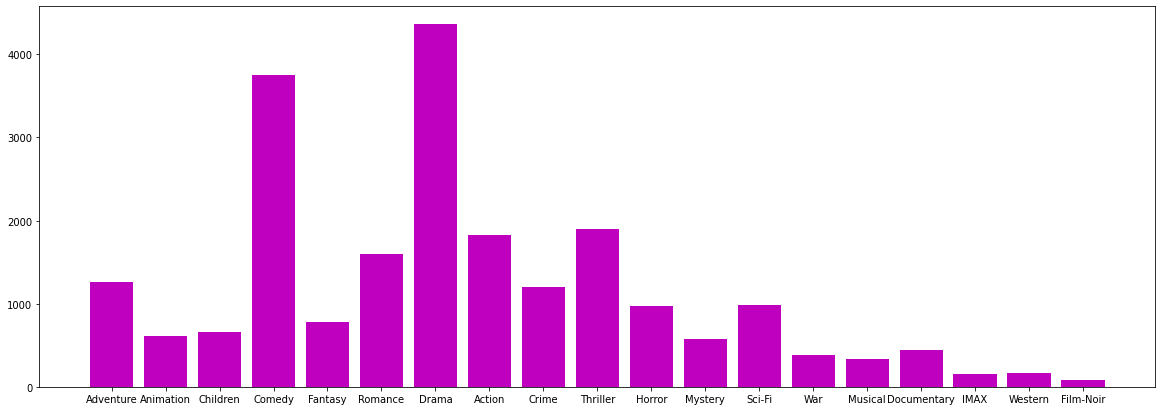

In [ ]:
plt.figure(figsize=(20,7))
generlist = movies['genres'].apply(lambda generlist_movie : str(generlist_movie).split("|"))
geners_count = {}

for generlist_movie in generlist:
    for gener in generlist_movie:
        if(geners_count.get(gener,False)):
            geners_count[gener]=geners_count[gener]+1
        else:
            geners_count[gener] = 1       
geners_count.pop("(no genres listed)")
plt.bar(geners_count.keys(),geners_count.values(),color='m')


In [ ]:
print(" Rating DataFrame"+ str(ratings.shape)+"\n Movies DataFrame"+ str(movies.shape))

 Rating DataFrame(100836, 4)
 Movies DataFrame(9742, 3)


In [ ]:
merge_ratings_movies = pd.merge(movies, ratings, on='movieId', how='inner')

In [ ]:
merge_ratings_movies.head(5)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [ ]:
merge_ratings_movies = merge_ratings_movies.drop('timestamp', axis=1)

In [ ]:
merge_ratings_movies.shape

(100836, 5)

In [ ]:
#implementation
df_movies_ratings=pd.merge(movies, ratings)
df_movies_ratings.head(965)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
960,17,Sense and Sensibility (1995),Drama|Romance,54,3.0,830248246
961,17,Sense and Sensibility (1995),Drama|Romance,68,3.5,1158531987
962,17,Sense and Sensibility (1995),Drama|Romance,71,1.0,864737933
963,17,Sense and Sensibility (1995),Drama|Romance,84,5.0,857653240


In [ ]:
ratings_matrix_items = df_movies_ratings.pivot_table(index=['movieId'],columns=['userId'],values='rating').reset_index(drop=True)
ratings_matrix_items.fillna( 0, inplace = True )
ratings_matrix_items.head(15)

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
0,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,4.5,3.5,4.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,3.0,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
1,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.5,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,2.5,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,4.5,0.0,0.0,0.0,3.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,3.5,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,4.5,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0
6,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.5,3.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,0.0,3.5,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,3.5,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0


In [ ]:
movie_similarity = 1-pairwise_distances( ratings_matrix_items.to_numpy(), metric="cosine" )
np.fill_diagonal( movie_similarity, 0 ) 
#movie_similarity array to df
ratings_matrix_items = pd.DataFrame( movie_similarity )
ratings_matrix_items.head(14)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9684,9685,9686,9687,9688,9689,9690,9691,9692,9693,9694,9695,9696,9697,9698,9699,9700,9701,9702,9703,9704,9705,9706,9707,9708,9709,9710,9711,9712,9713,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,0.000000,0.410562,0.296917,0.035573,0.308762,0.376316,0.277491,0.131629,0.232586,0.395573,0.323976,0.219680,0.151236,0.178144,0.104528,0.292152,0.334693,0.167993,0.383641,0.147039,0.335337,0.226570,0.164626,0.215168,0.324072,0.170520,0.106747,0.124567,0.190233,0.047388,0.178382,0.508593,0.505196,0.289150,0.135167,0.351076,0.041815,0.117506,0.101851,0.101023,...,0.039836,0.068056,0.068056,0.052282,0.068056,0.036070,0.047256,0.095825,0.088476,0.025521,0.025521,0.119572,0.000000,0.0,0.068056,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.025521,0.051042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.410562,0.000000,0.282438,0.106415,0.287795,0.297009,0.228576,0.172498,0.044835,0.417693,0.322252,0.168642,0.194398,0.099373,0.229191,0.239683,0.208254,0.182717,0.497560,0.129955,0.273282,0.244361,0.128695,0.203931,0.159834,0.162491,0.151033,0.102551,0.163939,0.018742,0.244840,0.381811,0.453192,0.180312,0.148042,0.359441,0.000000,0.121620,0.044393,0.143692,...,0.134047,0.107667,0.000000,0.060311,0.000000,0.000000,0.000000,0.162151,0.202349,0.000000,0.000000,0.084074,0.094208,0.0,0.000000,0.094208,0.0,0.0,0.000000,0.094208,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.296917,0.282438,0.000000,0.092406,0.417802,0.284257,0.402831,0.313434,0.304840,0.242954,0.249568,0.203237,0.144049,0.176544,0.144100,0.294055,0.215245,0.200013,0.279409,0.094867,0.302458,0.251466,0.151596,0.291192,0.214832,0.198667,0.256104,0.096027,0.114349,0.000000,0.207695,0.287436,0.220458,0.290828,0.099034,0.244895,0.099570,0.191409,0.136112,0.200830,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064119,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.035573,0.106415,0.092406,0.000000,0.188376,0.089685,0.275035,0.158022,0.000000,0.095598,0.153910,0.000000,0.152057,0.110435,0.157336,0.112660,0.236706,0.000000,0.074807,0.000000,0.129864,0.160161,0.000000,0.131412,0.179436,0.178241,0.129602,0.053394,0.040659,0.000000,0.281444,0.086558,0.123893,0.235246,0.000000,0.058324,0.000000,0.125394,0.000000,0.198794,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.308762,0.287795,0.417802,0.188376,0.000000,0.298969,0.474002,0.283523,0.335058,0.218061,0.272182,0.207889,0.116569,0.255333,0.103934,0.194478,0.276254,0.228271,0.281046,0.051730,0.224821,0.216080,0.163674,0.235350,0.289412,0.217173,0.279038,0.037623,0.143247,0.000000,0.252241,0.285743,0.263195,0.301824,0.104168,0.246391,0.000000,0.178707,0.021816,0.283314,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035327,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5,0.376316,0.297009,0.284257,0.089685,0.298969,0.000000,0.244105,0.147562,0.214088,0.386414,0.289365,0.168019,0.032767,0.287064,0.137209,0.492802,0.242291,0.197879,0.257032,0.183317,0.392634,0.330654,0.215497,0.167433,0.439656,0.216535,0.134987,0.057819,0.210525,0.136898,0.249879,0.510677,0.274038,0.364807,0.038229,0.286632,0.000000,0.241505,0.214670,0.214194,...,0.147961,0.000000,0.000000,0.055065,0.000000,0.000000,0.000000,0.088478,0.134742,0.000000,0.000000,0.076761,0.098302,0.0,0.000000,0.098302,0.0,0.0,0.000000,0.098302,0.0,0.000000,0.000000,0.

In [ ]:
def item_similarity(movieName): 
    
    try:
       
        user_inp=movieName
        inp=movies[movies['title']==user_inp].index.tolist()
      
        inp=inp[0]
        
        movies['similarity'] = ratings_matrix_items.iloc[inp]
       
        movies.columns = ['movie_id', 'title', 'release_date','similarity']
    except:
        print("The movie is not there!")

In [ ]:
def recommend_acto_item_similarity(user_id):
    
    user_movie= df_movies_ratings[(df_movies_ratings.userId==user_id) & df_movies_ratings.rating.isin([5,4.5])][['title']]
   
    #userId & title in user_movie
    user_movie=user_movie.iloc[0,0] #movie name [0,0]
    
    item_similarity(user_movie)
    sort_mov_userchoice=movies.sort_values( ["similarity"], ascending = False )
    
    sort_mov_userchoice=sort_mov_userchoice[sort_mov_userchoice['similarity'] >=0.25]['movie_id']
    #print(sort_mov_userchoice)
    recommended_movies=list()
    df_recommended_item=pd.DataFrame()
    user2Movies= ratings[ratings['userId']== user_id]['movieId']

    for movieId in sort_mov_userchoice:
            if movieId not in user2Movies:
              
              df_new= ratings[(ratings.movieId==movieId)]
              
              df_recommended_item=pd.concat([df_recommended_item,df_new])
    best10=df_recommended_item.sort_values(["rating"], ascending = False )[1:10] 
    
    best10= best10.drop_duplicates('movieId')
    #print(best10)
    return best10['movieId']

In [ ]:
def movieIdToTitle(listMovieIDs):
    movie_titles= list()
    for id in listMovieIDs:
        movie_titles.append(movies[movies['movie_id']==id]['title'])

        
    return movie_titles

In [ ]:
user_id=110
print("Recommended movies for the user ,:\n",movieIdToTitle(recommend_acto_item_similarity(user_id)))

Recommended movies for the user ,:
 [92    Happy Gilmore (1996)
Name: title, dtype: object, 900    Raiders of the Lost Ark (Indiana Jones and the...
Name: title, dtype: object, 613    Trainspotting (1996)
Name: title, dtype: object, 685    Vertigo (1958)
Name: title, dtype: object]
